## ▣ 동영상 처리와 저장

### ▶ 동영상
#### 컴퓨터 모니터의 화상이 텔레비전의 화상처럼 움직이는 것
#### 한장 한장의 사진(frame)을 연속적으로 출력하는 방식  

### ■ 초당 프레임 수(Frames Per Second; FPS)
1초 동안 보여주는 화면의 수

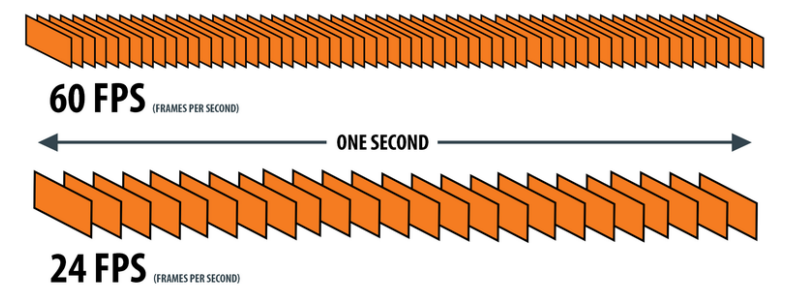

### ■ 프레임 레이트(Frame rate)
디스플레이 장치가 화면 하나의 데이터를 표시하는 속도   
프레임 속도(frame速度) 또는 프레임률(frame率)

### ▶ 웹캠(webcam)
Getting Started with Videos   
https://docs.opencv.org/4.x/dd/d43/tutorial_py_video_display.html

In [1]:
### packages
import cv2
import numpy as np
import os

### ■ 기본 출력

In [2]:
### 카메라 연결
cap = cv2.VideoCapture(0)
### 동영상 출력
while cv2.waitKey(1) < 0:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        ### Frame 출력
        cv2.imshow("VideoFrame", frame)
    else:
        print("Can't receive frame. Exiting...")
        break
### When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

### ■ 동영상 처리
Grayscale


In [3]:
### 카메라 연결
cap = cv2.VideoCapture(0)

### 동영상 출력
while cv2.waitKey(1) < 0:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        ### Grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        ### Frame 출력
        cv2.imshow('VideoFrame', frame)
    else:
        print("Can't receive frame. Exiting...")
        break
### When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

#### 감마보정


In [6]:
### 감마보정 함수
def fn_gamma_correction(img, gamma=1):
    lookUpTable = np.empty((1, 256), np.uint8)
    for i in range(256) :
        lookUpTable[0, i] = np.clip(pow (i / 255.0, gamma) * 255.0, 0, 255)
    return cv2.LUT(img, lookUpTable)

In [17]:
### 카메라 연결
cap = cv2.VideoCapture(0)

### 동영상 출력
while cv2.waitKey(1) < 0:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        k = cv2.waitKey(1)
        ### 감마보정
        #frame = fn_gamma_correction(frame, 0.67)
        

        ### 중간값 필터
        #frame = cv2.medianBlur(frame, 3)

        ### 가우시안 필터
        frame = cv2.GaussianBlur(frame, (3, 3), 0)
        ### 영상 저장
        if k == ord('s'):
            img_out_name = easygui.filesavebox('파일 이름 입력')
            cv2.imwrite(img_out_name, frame)
            
        ### 종료
        if k == ord('q'):
            break
        ### Frame 출력
        cv2.imshow('VideoFrame', frame)
    else:
        print("Can't receive frame. Exiting...")
        break
### When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [8]:
### 임펄스 잡음(impulse noise) 추가 함수
def fn_add_noise_impulse(src, rate = 0.15):
    h, w, c = src.shape
    noise_idx = np.random.sample((h, w, c))
    noise_impulse = np.zeros((h, w, c), dtype='uint8')
    noise_impulse[noise_idx<rate/2] = -255
    noise_impulse[noise_idx>(1-rate/2)] = 255
    return cv2.add(src, noise_impulse)

In [9]:
### 임펄스 잡음 추가
img_noise_impulse = fn_add_noise_impulse(img_lena, 0.15)

### 중간값 필터
img_median = cv2.medianBlur(img_noise_impulse, 3)

### 가우시안 필터
img_Gauss = cv2.GaussianBlur(img_noise_impulse, (3, 3), 0)

NameError: name 'img_lena' is not defined

### ■ 동영상 처리 응용
s: 저장   
q: 종료

In [3]:
### Packages
import easygui

In [11]:
### 카메라 연결
cap = cv2.VideoCapture(0)

### 동영상 출력
while True:
    # Captuure frame-by-frame
    ret, frame = cap.read()
    if ret:
        ### 키보드 입렵
        k = cv2.waitKey(1)
      
        
        ### 영상 저장
        if k == ord('s'):
            imf_out_name = easygui.filesavebox('파일 이름 입력')
            cv2.imwrite(img_out_name, frame)
            
        ### 종료
        if k == ord('q'):
            break
        
        ### frame 출력
        cv2.imshow("VideoFrame", frame)
    else:
        print("Can't, receive frame. Exiting...")
        break

### When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
            
        

### ▶ 동영상 파일
##### 한남대학교 홍보영상
http://www.hannam.ac.kr/kor/about/about_01_6.html   
2022 한남대학교 홍보영상 (2분 20초) > [DOWN] > 파일명 수정(영문+숫자) : 2022 hnu.mp4   

In [4]:
import os
import time

In [5]:
os.chdir(r'C:\Users\kr937\Desktop\drive\2023\Image Process')

In [5]:
### 파일 연결
cap = cv2.VideoCapture()

### 동영상 출력
while cv2.waitKey(1) < 0:
    time.sleep(0.01)
    ### Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        ### 크기 조절 - 50% 축소
        frame = cv2.resize(frame, dsize=(0, 0), fx=0.5, fy=0.5,
                           interpolation=cv2.INTER_AREA)
        
        ### Frame 출력
        cv2.imshow("VideoFrame", frame)
    else:
        print("Can't receive frame. Exiting...")
        break

### When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Can't receive frame. Exiting...


### ■ 동영상 처리 응용
s: 저장 
q: 종료

In [5]:
### Packages
import time

In [6]:
### 감마보정 함수
def fn_gamma_correction(img, gamma=1):
    lookUpTable = np.empty((1, 256), np.uint8)
    for i in range(256) :
        lookUpTable[0, i] = np.clip(pow (i / 255.0, gamma) * 255.0, 0, 255)
    return cv2.LUT(img, lookUpTable)

In [8]:
import cv2
import numpy as np

In [9]:
### 파일 연결
cap = cv2.VideoCapture(r"D:\23-2 채플좌석\3주차\09.20(수4) 가.MTS")

### 동영상 출력
while True:
    ### 반복 재생 설정
    if True & (cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT)):
        cap.get(cv2.CAP_PROP_POS_FRAMES, 0)
    
    ### 출력 속도 조절
    time.sleep(0.01)
    
    ### Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        ### 키보드 입력
        k = cv2.waitKey(1)
        
        ### 크기 조절 - 50% 축소
        frame = cv2.resize(frame, dsize=(0, 0), fx=0.7, fy=0.7,
                           interpolation=cv2.INTER_AREA)
        frame = fn_gamma_correction(frame, 0.4)
        
        ### 영상 저장
        if k == ord('s'):
            img_out_name = r"C:\Users\kr937\Desktop\drive\2023\Image Process\T4.png"
            cv2.imwrite(img_out_name, frame)
        
        ### 종료
        if k == ord('q'):
            break
        
        ### Frame 출력
        cv2.imshow("VideoFrame", frame)
    
    else:
        print("Can't receive frame. Exiting...")
        break

### When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

### ▶ 동영상 저장
Fourcc(four-character code; 4-문자코드)   
동영상 파일의 코덱 정의 - https://www.fourcc.org/codecs.php   
    In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2   
        XVID is more preferable. MJPG results in high size video. X264 gives very small size video    
    In Windows: DIVX  
    In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv)   

In [13]:
### 파일 연결
cap = cv2.VideoCapture(r"C:\Users\kr937\Desktop\drive\2023\Image Process\2023_small_kor.mp4")

### 코덱
fourcc = cv2.VideoWriter_fourcc(*'FMP4')

### frame width, height, fps(초당 frame 수)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # cap.get(3)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # cap.get(4)
fps = cap.get(cv2.CAP_PROP_FPS)             # cap.get(5)

### 영상 저장 설정
out = cv2.VideoWriter(r"C:\Users\kr937\Desktop\drive\2023\Image Process\2023_small_kor(2).mp4",
                      fourcc, fps, (int(width/2), int(height/2)))

### 동영상 출력
while cv2.waitKey(1) < 0:
    ### Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
    
        
        ### 크기 조절 - 50% 축소
        frame = cv2.resize(frame, dsize=(0,0), fx=0.5, fy=0.5,
                         interpolation=cv2.INTER_AREA)
        
        ### Frame 출력
        cv2.imshow('VideoFrame', frame)
        
        ### Frame 저잘
        out.write(frame)
        
    else:
        print("Can't receive. Exiting...")
        break
    
### release the out
out.release()

### When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

### Grayscale

In [3]:
### 파일 연결
cap = cv2.VideoCapture(r"C:\Users\kr937\Desktop\drive\2023\Image Process\2023_small_kor.mp4")

### 코덱
fourcc = cv2.VideoWriter_fourcc(*'FMP4')

### frame width, height, fps(초당 frame 수)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)   # cap.get(3)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # cap.get(4)
fps = cap.get(cv2.CAP_PROP_FPS)             # cap.get(5)

### 영상 저장 설정
out = cv2.VideoWriter(r"C:\Users\kr937\Desktop\drive\2023\Image Process\2023_small_kor(2).mp4",
                      fourcc, fps, (int(width/2), int(height/2)))

### 동영상 출력
while cv2.waitKey(1) < 0:
    ### Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        ### Grayscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)       
        
        ### 크기 조절 - 50% 축소
        frame = cv2.resize(frame, dsize=(0,0), fx=0.5, fy=0.5,
                         interpolation=cv2.INTER_AREA)
        
        ### Frame 출력
        #cv2.imshow('VideoFrame', frame)
        
        ### Frame 저잘
        out.write(frame)
        
    else:
        print("Can't receive. Exiting...")
        break
    
### release the out
out.release()

### When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

### ▣ 과제
10초 웹캠 또는 동영상을 영상 처리하여 파일로 저장하시오.

In [16]:
### 감마보정 함수
def fn_gamma_correction(img, gamma=1):
    lookUpTable = np.empty((1, 256), np.uint8)
    for i in range(256) :
        lookUpTable[0, i] = np.clip(pow (i / 255.0, gamma) * 255.0, 0, 255)
    return cv2.LUT(img, lookUpTable)

In [20]:
### 파일 연결
cap = cv2.VideoCapture(r"C:\Users\kr937\Desktop\drive\2023\Image Process\jiajihun.MOV")

### 코덱
fourcc = cv2.VideoWriter_fourcc(*'FMP4')

### frame width, height, fps(초당 frame 수)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH) # cap.get(3)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # cap.get(4)
fps = cap.get(cv2.CAP_PROP_FPS) # cap.get(5)

### 영상 저장 설정
out = cv2.VideoWriter(r"C:\Users\kr937\Desktop\drive\2023\Image Process\jiajihun(2).mp4",
                      fourcc, fps, (int(width/2), int(height/2)))

### 동영상 출력
while cv2.waitKey(1) < 0:
    ### Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        
        ### 크기 조절 - 50% 축소
        frame = cv2.resize(frame, dsize=(0,0), fx=0.5, fy=0.5,
                           interpolation=cv2.INTER_AREA)
        
        ### Grayscale
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)  
        
        ### 감마보정
        frame = fn_gamma_correction(frame, 0.67)
        
        ### Frame 출력
        cv2.imshow("VideoFrame", frame)
        
        ### Frame 저장
        out.write(frame)
        
    else:
        print("Can't receive frame. Exiting...") 
        break
    
### release the out
out.release()

### When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
cv2.CAP_PROP_FPS

5